# 0. Operacje na danych w plikach

# Dane I/O

- Wejście/wyjście danych to kluczowa część pandas, ponieważ często będziemy uzyskiwać dane, które trzeba zaimportować do pandas lub eksportować dane wyczyszczone w pandas.
- Te dane mogą pochodzić z różnych formatów plików, chociaż w większości przypadków będą pochodzić tylko z kilku z nich, które omówimy tutaj.
- Zajmiemy się importem i eksportem do plików CSV i XLSX, które są najczęstszymi formami danych.
- Istnieją inne metody, takie jak pliki html, SQL, tabele, JSON itp., o których można poczytać w przypadku gdy będzie to potrzebne chociażby do pracy.
- Metody to: *.read_* lub *.to_*, z licznymi argumentami, które można dodawać zgodnie z wymaganiami.
— Podstawowym argumentem jest nazwa pliku w postaci ciągu, który musi znajdować się w tym samym katalogu lub mieć określoną pełną ścieżkę do pliku.
- Podczas zapisywania plików ustawienie index=False jest również przydatne, aby uniknąć replikacji kolumny indeksu, ponieważ pandas automatycznie dodaje indeks podczas odczytu pliku.

In [ ]:
import pandas as pd

## CSV

- Pliki CSV __(comma-separated values)__ są bardzo powszechnym sposobem przechowywania danych.
- Ich najczęstszą dosłowną reprezentacją jest zbiór wartości oddzielonych przecinkami, jak wskazuje nazwa.
- Wszystkie dane dla jednej obserwacji znajdują się w jednej linii: każda nowa linia to nowa obserwacja.
- Stąd liczba wartości w wierszu odpowiada liczbie kolumn, a liczba wierszy odpowiada liczbie wierszy.
- Stąd często pierwszy wiersz to nazwy kolumn, ale nie musi tak być.
- Przecinek w tym przypadku nazywa się __'delimiter'__, ponieważ pokazuje różnicę (lub granicę) między jedną wartością a następną.
- Innymi typowymi ogranicznikami są średniki i tabulatory (nazywane również wartościami rozdzielanymi tabulatorami/tsv).
- Zwykle, jeśli używasz danych z krajów Europy kontynentalnej (Francja/Hiszpania itp.), użyją one średników, dlatego niektórzy preferują wartości oddzielone __znakami__ dla pliku CSV.
- Musimy być ostrożni, aby sprawdzić, jaki dokładnie jest delimiter, ponieważ częstym błędem jest odczytanie pliku z niewłaściwym delimiterem, a tym samym uzyskanie dziwnej reprezentacji w danych.
- Pliki CSV można również odczytać w programie Excel.
- Polecenie read_csv wymaga tylko formatu CSV, a nie koniecznie rozszerzenia nazwy pliku, więc może odczytywać pliki .txt w tym samym formacie.
- Używając go możemy określić tylko nazwę pliku, jeśli plik znajduje się w tym samym katalogu, ale musimy podać całą ścieżkę, jeśli znajduje się w innym katalogu. Ten sam proces dotyczy wszystkich plików odczytywanych lub zapisywanych za pomocą Pythona.
- Poniżej możemy zobaczyć reprezentację pliku CSV w formacie tekstowym:

![csv.png](csv.png)

Aby wczytać plik csv do pandas:

In [1]:
# zapisujemy wyjście read_csv do zmiennej
df = pd.read_csv('<filename>')

# metoda to_csv zapiuje dataframe do pliku
df.to_csv('<filename>')

NameError: name 'pd' is not defined

Przykład:

In [ ]:
# import pakietu pandas
import pandas as pd


# wczytanie pliku csv do dataframe


# wyświetlenie DataFrame


## JSON

- JSON (JavaScript Object Notation) to format pliku przechowujący dane w sposób łatwy do odczytania zarówno przez ludzi, jak i maszyny.
- Jest to równie przydatny sposób wymiany danych przez przeglądarkę i serwer, dlatego jest szeroko stosowany w aplikacjach internetowych do kodowania.
- W rzeczywistości pliki .ipynb Jupyter Notebook są faktycznie przechowywane w formacie JSON.
- Pandas mogą również czytać i pisać z i do JSON za pomocą następujących poleceń.
- Widzimy plik JSON w edytorze tekstu poniżej:


![json.png](json.png)
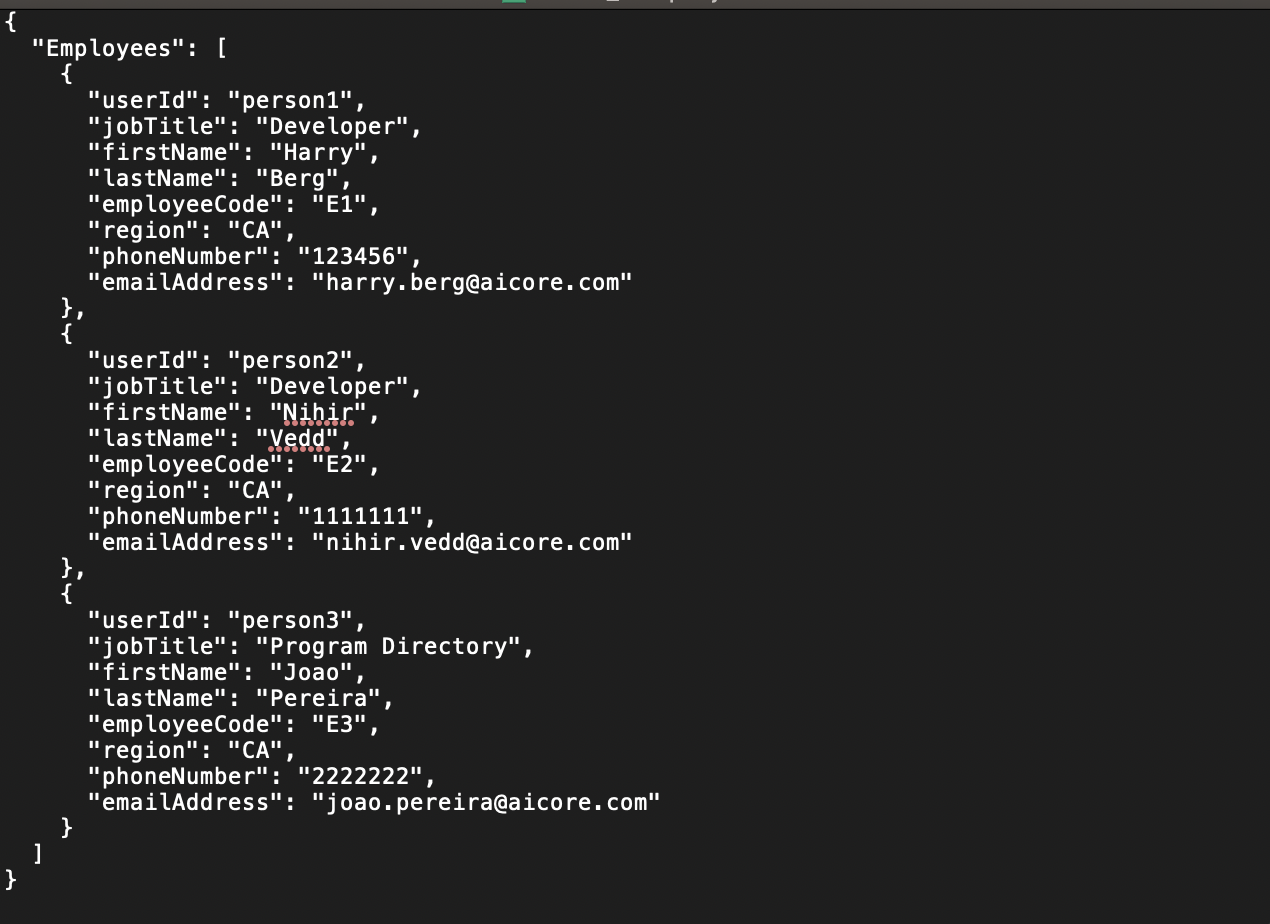

In [ ]:
# json
df = pd.read_json('<filename>')
df.to_json('<filename>')

In [ ]:
# import pandas
import pandas as pd
from pandas import json_normalize
import json

# wczytaj plik json
df = pd.read_json('JSON_sample.json')

# wyświetl jako DataFrame
df.head()


# Teraz chcemy wczytać dane
with open('JSON_sample.json', "rb") as f:
  data = json.load(f)

# df = pd.read_json(json.dumps(data["Employees"]))
# df.head()

print(data["Employees"])

df = json_normalize(data["Employees"])
df.head()

[{'userId': 'person1', 'jobTitle': 'Developer', 'firstName': 'Harry', 'lastName': 'Berg', 'employeeCode': 'E1', 'region': 'CA', 'phoneNumber': '123456', 'emailAddress': 'harry.berg@aicore.com'}, {'userId': 'person2', 'jobTitle': 'Developer', 'firstName': 'Nihir', 'lastName': 'Vedd', 'employeeCode': 'E2', 'region': 'CA', 'phoneNumber': '1111111', 'emailAddress': 'nihir.vedd@aicore.com'}, {'userId': 'person3', 'jobTitle': 'Program Directory', 'firstName': 'Joao', 'lastName': 'Pereira', 'employeeCode': 'E3', 'region': 'CA', 'phoneNumber': '2222222', 'emailAddress': 'joao.pereira@aicore.com'}]


,userId,jobTitle,firstName,lastName,employeeCode,region,phoneNumber,emailAddress
0,person1,Developer,Harry,Berg,E1,CA,123456,harry.berg@aicore.com
1,person2,Developer,Nihir,Vedd,E2,CA,1111111,nihir.vedd@aicore.com
2,person3,Program Directory,Joao,Pereira,E3,CA,2222222,joao.pereira@aicore.com


## XLSX
- .xlsx to format plików dla arkuszy kalkulacyjnych Microsoft Excel.
- To nie wymaga wielu wyjaśnień poza stwierdzeniem, że pandas nie potrafią czytać we wzorach, makrach czy wykresach, tylko surowe dane.
- Ponadto musimy określić nazwę arkusza do odczytu jako dataframe lub do zapisu podczas korzystania z metod read_excel i to_excel.

In [ ]:
# read_excel działa tak samo jak wszystkie metody read_ 
df = pd.read_excel('<filename>',sheet_name='<sheetname>')

# pamiętaj o podaniu nazwy sheet name dla plików Excel
df.to_excel('<filename>',sheet_name='<sheetname>')

## Tylko w ramach odniesienia: XML
- XML (eXtensible Markup Language) to kolejny sposób wymiany danych między przeglądarkami i serwerami (JSON jest alternatywą dla XML).
- Stąd, podobnie jak w przypadku JSON, możemy wykorzystać XML do pozyskiwania danych z sieci.
- XML jest językiem znaczników, takim jak HTML, więc zawiera dane i informacje o tym, jak ustrukturyzować te dane, ale nie w jaki sposób są wyświetlane.
- Dlatego potrzebujemy API do wydobycia danych z pliku XML, a więc nie ma prostej metody na odczytanie XML do pandas.
- Możesz skorzystać z następującego procesu, chociaż nie jest to jedyny możliwy sposób:

![xml.PNG](xml.PNG)

- Możesz użyć tej gotowej funkcji do parsowania plików XML, która wymagaja tylko 2 argumentów:
     - Nazwa pliku XML
     - Kolumn ramki danych (dataframe) (pola w każdej obserwacji w pliku XML)

In [ ]:
import pandas as pd
import xml.etree.ElementTree as et

def parse_XML(xml_file, df_cols): 
    """Przeanalizuj wejściowy plik XML i zapisz wynik w pandas
    DataFrame z podanymi kolumnami.

    Pierwszym elementem df_cols ma być identyfikator,
    który jest atrybutem każdego elementu węzła w
    danych XML; inne funkcje zostaną przeanalizowane z treści tekstowej
    każdego podelementu.
    """
    
    xtree = et.parse(xml_file)
    xroot = xtree.getroot()
    rows = []
    
    for node in xroot: 
        res = []
        res.append(node.attrib.get(df_cols[0]))
        for el in df_cols[1:]: 
            if node is not None and node.find(el) is not None:
                res.append(node.find(el).text)
            else: 
                res.append(None)
        rows.append({df_cols[i]: res[i] 
                     for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)
        
    return out_df

In [ ]:
df = parse_XML("employees.xml", ["name", "email", "department", "age"])
df